# Определение перспективного тарифа для телеком-компании

**Описание проекта**

Мы выступаем в качестве аналитика компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

**Тариф «Смарт»**

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

**Описание данных**

Таблица **users** (содержит информацию о пользователях связи):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица **calls** (содержит информацию о звонках зарегистрированных пользователей):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица **messages** (содержит информацию о сообщениях зарегистрированных пользователей):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица **internet** (содержит информацию об интернет-сессиях зарегистрированных пользователей):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица **tariffs** (содержит информацию о тарифах для пользователей связи):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Откройте файл с данными и изучите общую информацию

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats as st

In [2]:
try:
    calls = pd.read_csv('calls.csv')
    internet = pd.read_csv('internet.csv')
    messages = pd.read_csv('messages.csv')
    tariffs = pd.read_csv('tariffs.csv')
    users = pd.read_csv('users.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv') 

### Таблица calls

In [3]:
display(calls.head())
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


### Таблица internet

In [4]:
display(internet.head())
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


### Таблица messages

In [5]:
display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### Таблица tariffs

In [6]:
display(tariffs.head())
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Таблица users

In [7]:
display(users.head())
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Вывод**

У нас имеются 4 таблицы с данными о пользователях и получаемых ими услугах связи, плюс одна таблица с информацией о тарифах.

Исходя увиденного можно прикинуть общий объём работ по предобработке:

- Необходимо привести даты к единому типу *datatime*;
- Нужно удалить незадокументированный столбец *Unnamed: 0* в таблице *internet*;
- Также стоит округлить значения *звонки*;
- Для дальнейшей работы, было бы не плохо объеденить все в одну таблицу.

## Подготовьте данные

- Приведите данные к нужным типам;
- Найдите и исправьте ошибки в данных, если они есть.

### Замена типов данных

In [8]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

In [9]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [10]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

In [11]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

In [12]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

**Вывод**

Все даты приведены к единому виду, благодаря чему шанс запутаться в них и произвести ошибочные выводы значительно снизился

### Исправления в данных

Округлим звонки в большую сторону иприведем значения к целочисленному типу

In [13]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

Удалим столбец *Unnamed: 0* из таблицы *internet*, т.к. он дублирует индексы, и вообще отсутсвует в документации

In [14]:
internet.drop(columns = 'Unnamed: 0', inplace = True)

На всякий случай проверим наличие явных дубликатов

In [15]:
dict = {
    'calls': calls,
    'internet': internet,
    'messages': messages,
    'tariffs': tariffs,
    'users': users
}

for name, df in dict.items():
    print('Дубликатов в таблице {}: {}'.format(name, df.duplicated().sum()))

Дубликатов в таблице calls: 0
Дубликатов в таблице internet: 0
Дубликатов в таблице messages: 0
Дубликатов в таблице tariffs: 0
Дубликатов в таблице users: 0


**Вывод**

Избавились от ненужного, округлили и проверили отсутсвие явных дубликатов. Думаю, можно приступать к формированию сводной таблицы

### Формирование единой таблицы

Теперь нам нужно отобразить для каждого пользователя информацию о количестве звонков, потраченных минут, отправленных СМС, объем израсходованного интернет-трафика и тратах каждого пользователя за каждый месяц

Начнём с количества звонков и минут. Для этого добавим в таблицу calls столбцы с месяцем и округлённым значением минут и посчитаем количество совершённых звонков и минут в каждом месяце

In [16]:
calls['call_month'] = calls['call_date'].dt.month
calls['round_duration'] = np.ceil(calls['duration'])

calls_pivot = calls.pivot_table(index=['user_id', 'call_month'], values='round_duration', aggfunc=['count', 'sum'])
calls_pivot

count            sum
                   round_duration round_duration
user_id call_month                              
1000    5                      22          159.0
        6                      43          172.0
        7                      47          340.0
        8                      52          408.0
        9                      58          466.0
...                           ...            ...
1498    10                     41          247.0
1499    9                       9           70.0
        10                     68          449.0
        11                     74          612.0
        12                     69          492.0

[3174 rows x 2 columns]

Теперь точно также посчитаем количество СМС в каждом месяце

In [17]:
messages['msg_month'] = messages['message_date'].dt.month
msg_pivot = messages.pivot_table(index=['user_id', 'msg_month'], values='id', aggfunc='count')
msg_pivot.columns = ['messages_per_month']
msg_pivot

messages_per_month
user_id msg_month                    
1000    5                          22
        6                          60
        7                          75
        8                          81
        9                          57
...                               ...
1498    10                         42
1499    9                          11
        10                         48
        11                         59
        12                         66

[2717 rows x 1 columns]

Теперь посчитаем интернет трафик за каждый месяц

In [18]:
internet['session_month'] = internet['session_date'].dt.month

internet['mb_used'] = np.ceil(internet['mb_used'])

internet_pivot = internet.pivot_table(index=['user_id', 'session_month'], values='mb_used', aggfunc='sum')
internet_pivot.columns = ['mb_used_per_month']
internet_pivot

mb_used_per_month
user_id session_month                   
1000    5                         2256.0
        6                        23257.0
        7                        14016.0
        8                        14070.0
        9                        14581.0
...                                  ...
1498    10                       20604.0
1499    9                         1848.0
        10                       17809.0
        11                       17984.0
        12                       13077.0

[3203 rows x 1 columns]

Объединим датафреймы по индексам пользователей. Для этого используем метод *join()*. А заодно и посмотрим есть ли в данных пропущенные значения

In [19]:
pivot_table = (
    calls_pivot
    .join(msg_pivot, on=['user_id', 'call_month'], how='outer')
    .join(internet_pivot, on=['user_id', 'call_month'], how='outer')
)
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1476, 4)
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (count, round_duration)  3174 non-null   float64
 1   (sum, round_duration)    3174 non-null   float64
 2   messages_per_month       2717 non-null   float64
 3   mb_used_per_month        3203 non-null   float64
dtypes: float64(4)
memory usage: 130.4 KB


Заменим пропуски нулями и сбросим индексы

In [20]:
pivot_table.fillna(0, inplace=True)
pivot_table.reset_index(inplace=True)
pivot_table.head()

,user_id,call_month,"(count, round_duration)","(sum, round_duration)",messages_per_month,mb_used_per_month
0,1000,5,22.0,159.0,22.0,2256.0
1,1000,6,43.0,172.0,60.0,23257.0
2,1000,7,47.0,340.0,75.0,14016.0
3,1000,8,52.0,408.0,81.0,14070.0
4,1000,9,58.0,466.0,57.0,14581.0


Для удобства в дальнейшем, переименуем некоторые столбцы

In [21]:
cols = pivot_table.columns.to_list()
cols[1] = 'month'
cols[2] = 'calls_per_month'
cols[3] = 'minutes_per_month'
pivot_table.columns = cols
pivot_table.head()

,user_id,month,calls_per_month,minutes_per_month,messages_per_month,mb_used_per_month
0,1000,5,22.0,159.0,22.0,2256.0
1,1000,6,43.0,172.0,60.0,23257.0
2,1000,7,47.0,340.0,75.0,14016.0
3,1000,8,52.0,408.0,81.0,14070.0
4,1000,9,58.0,466.0,57.0,14581.0


Посмотрим что получилось

In [22]:
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             3214 non-null   int64  
 1   month               3214 non-null   int64  
 2   calls_per_month     3214 non-null   float64
 3   minutes_per_month   3214 non-null   float64
 4   messages_per_month  3214 non-null   float64
 5   mb_used_per_month   3214 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 150.8 KB


Заменим тип в столбцах 'calls_per_month', 'minutes_per_month' и 'messages_per_month' на целочисленный

In [23]:
pivot_table[['calls_per_month', 'minutes_per_month', 'messages_per_month']] = pivot_table[['calls_per_month', 'minutes_per_month', 'messages_per_month']].astype('int64')
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             3214 non-null   int64  
 1   month               3214 non-null   int64  
 2   calls_per_month     3214 non-null   int64  
 3   minutes_per_month   3214 non-null   int64  
 4   messages_per_month  3214 non-null   int64  
 5   mb_used_per_month   3214 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 150.8 KB


И присоединим столбец *tariff* из таблицы *users* для того, чтобы было удобно считать помесячную выручку с каждого пользователя.

In [24]:
pivot_table = pivot_table.merge(users[['user_id', 'tariff', 'city']], on='user_id', how='left')
pivot_table.head()

,user_id,month,calls_per_month,minutes_per_month,messages_per_month,mb_used_per_month,tariff,city
0,1000,5,22,159,22,2256.0,ultra,Краснодар
1,1000,6,43,172,60,23257.0,ultra,Краснодар
2,1000,7,47,340,75,14016.0,ultra,Краснодар
3,1000,8,52,408,81,14070.0,ultra,Краснодар
4,1000,9,58,466,57,14581.0,ultra,Краснодар


Создадим функцию для расчёта ежемесячной выручки с каждого пользователя

In [25]:
def func_month_user_revenue(row):
    tariff_info = tariffs.query('tariff_name == @row.tariff')
    revenue = tariff_info['rub_monthly_fee'].values[0]
    
    minutes_diff = (row['minutes_per_month'] - tariff_info['minutes_included']).values[0]
    msg_diff = (row['messages_per_month'] - tariff_info['messages_included']).values[0]
    mb_diff = (row['mb_used_per_month'] - tariff_info['mb_per_month_included']).values[0]
    
    if minutes_diff > 0:
        revenue += tariff_info['rub_per_minute'].values[0] * minutes_diff
    if msg_diff > 0:
        revenue += tariff_info['rub_per_message'].values[0] * msg_diff
    if mb_diff > 0:
        revenue += tariff_info['rub_per_gb'].values[0] * np.ceil(mb_diff / 1024)
    return revenue

И применим её к нашей сводной таблице

In [26]:
pivot_table['month_revenue'] = pivot_table.apply(func_month_user_revenue, axis=1)
pivot_table.head()

,user_id,month,calls_per_month,minutes_per_month,messages_per_month,mb_used_per_month,tariff,city,month_revenue
0,1000,5,22,159,22,2256.0,ultra,Краснодар,1950.0
1,1000,6,43,172,60,23257.0,ultra,Краснодар,1950.0
2,1000,7,47,340,75,14016.0,ultra,Краснодар,1950.0
3,1000,8,52,408,81,14070.0,ultra,Краснодар,1950.0
4,1000,9,58,466,57,14581.0,ultra,Краснодар,1950.0


**Вывод**

- типы данных привели к формату *datatime*
- округлили звонки
- проверили на явные дубликаты
- сформировали единую таблицу

Думаю, теперь можно присмотреться к имеющимся данным поближе

## Проанализируйте данные

Опишем поведение клиентов оператора, исходя из выборки. Выясним сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Выведем среднее, стандартное отклонение и дисперсию минут разговоров, СМС и использованных МБ в месяц для тарифов "smart" и "ultra". Построим гистограммы и опишем распределения

In [27]:
columm = ['minutes_per_month', 'messages_per_month', 'mb_used_per_month']

for tariff_name in tariffs['tariff_name']:
    print(tariff_name)
    display(
            pivot_table
            .query('tariff == @tariff_name')[columm]
            .agg(func=['mean', 'std', np.var])
            )

smart


,minutes_per_month,messages_per_month,mb_used_per_month
mean,417.934948,33.384029,1.622919e+04
std,190.313730,28.227876,5.877577e+03
var,36219.315784,796.812958,3.454591e+07


ultra


,minutes_per_month,messages_per_month,mb_used_per_month
mean,526.623350,49.363452,1.948690e+04
std,317.606098,47.804457,1.009632e+04
var,100873.633397,2285.266143,1.019356e+08


Итак, что мы наблюдаем:

**Пользователи тарифа "smart" используют в среднем в месяц:**

- 418 минут на разговоры;
- 33 СМС;
- 16 ГБ интернета.

**Пользователи тарифа "ultra" используют в среднем в месяц:** 

- 527 минут на разговоры;
- 49 СМС;
- 19 ГБ интернета.

Исходя из изначальных данных о тарифах, можем видеть, что пользователи тарифа "ultra" в среднем не используют большую часть своих пакетных возможностей.

Построим распределения наших параметров за оба тарифа.

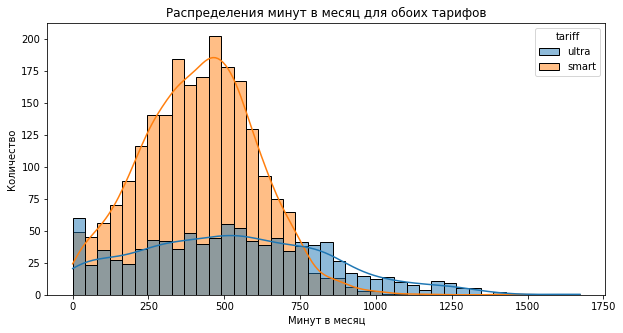

In [28]:
plt.figure(figsize = (10, 5))
sns.histplot(data = pivot_table, x = 'minutes_per_month', hue = 'tariff', kde = True)
plt.xlabel('Минут в месяц')
plt.ylabel('Количество')
plt.title('Распределения минут в месяц для обоих тарифов');

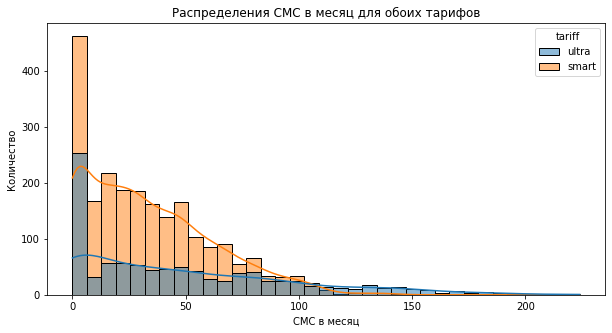

In [29]:
plt.figure(figsize = (10, 5))
sns.histplot(data = pivot_table, x = 'messages_per_month', hue = 'tariff', kde = True)
plt.xlabel('СМС в месяц')
plt.ylabel('Количество')
plt.title('Распределения СМС в месяц для обоих тарифов');

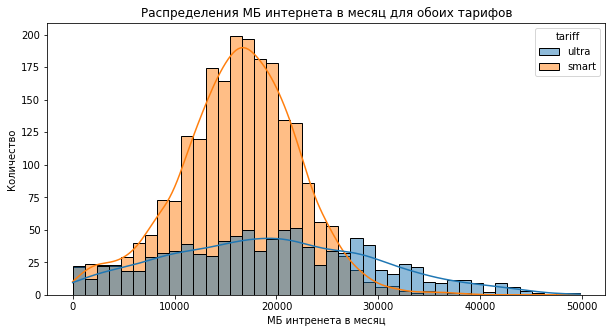

In [30]:
plt.figure(figsize = (10, 5))
sns.histplot(data = pivot_table, x = 'mb_used_per_month', hue = 'tariff', kde = True)
plt.xlabel('МБ интренета в месяц')
plt.ylabel('Количество')
plt.title('Распределения МБ интернета в месяц для обоих тарифов');

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>
     
Отличная визуализация. Очень показательна
    
</div>

По графикам заметно, что дисперсии параметров для пользователей тарифа "ultra" больше, чем тарифа "smart". Распределение минут и интернет трафика отдалённо напоминают нормальное. А вот распределение СМС имеет перекос влево. Причиной этого скорее всего является то, что для текстовой пререписки пользователи сейчас в основном используют мессенджеры и соц. сети

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab">
<b>Комментарий студента о доработке:</b>

Вот тут '*Указывает вниз*'
</div>

![This is an image](https://myoctocat.com/assets/images/base-octocat.svg)

<div style="border:solid Green 2px; padding: 40px">
<div class="alert alert-success">
<h2> Комментарий ревьюера_V2 <a class="tocSkip"> </h2>

<font color='green'><b>Все отлично! 👍:</b>  </font>

👍 
    
</div>

**Проанализируем также среднюю выручку**

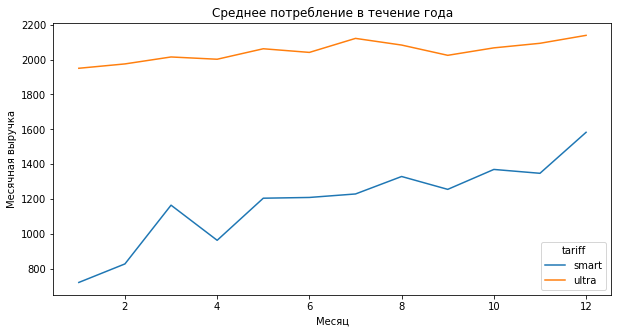

In [35]:
plt.figure(figsize=(10, 5))
sns.lineplot(
            x='month',
            y='month_revenue',
            hue='tariff',
            data=pivot_table.pivot_table(
                index = ['tariff', 'month'],
                values = 'month_revenue',
                aggfunc = 'mean'
                ).reset_index()
            )

plt.xlabel('Месяц')
plt.ylabel('Месячная выручка')
plt.title('Среднее потребление в течение года');

Как видно, тариф *ultra* ведёт себя более стабильно, т.к. с его возможностями перерасход у пользователей случается заметно реже, чем у пользователей тарифа *smart*. Возникает вопрос, так ли смарт этот тариф и его пользователи

**И посмотрим распределение месячной выручки для обоих тарифов**

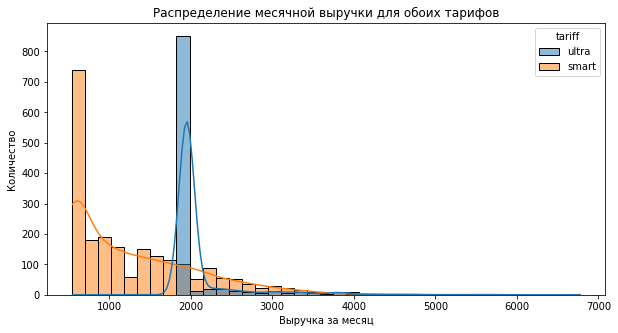

In [40]:
plt.figure(figsize = (10, 5))
sns.histplot(data = pivot_table, x = 'month_revenue', hue = 'tariff', kde = True)
plt.xlabel('Выручка за месяц')
plt.ylabel('Количество')
plt.title('Распределение месячной выручки для обоих тарифов');

**Вывод**

По средним показателям количества потраченных минут, СМС и МБ инетрнета, можно сказать, что в месяц пользователи обоих тарифов тратят примерно одинаковое количество по все трём параметрам.

Распределения минут разговора и мегабайт интернет трафика похожи на нормальное. А вот распределение СМС скошено влево и больше похоже на экспоненциальное, что скорее всего свидетельствует о том, что пользователи сейчас больше переписываются через мессенджеры и соц. сети.

Из анализа средней выручки видно, что распределения не похожи на нормальные, т.к. ежемесячная плата за тариф является минимальной выручкой с клиента и в то же время самым часто встречающимся значением. А также видно, что некоторые пользователи тарифа "смарт" платят даже больше, чем пользователи тарифа "ультра".

## Проверьте гипотезы

### Первая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Сформулируем гипотезы:

- нулевая гипотеза: средние выручки с клиента тарифов "смарт" и "ультра" равны
- альтернативная гипотеза: средние выручки с клиента тарифов "смарт" и "ультра" не равны

Уровень значимости зададим равным 5%. Так как траты пользователей каждого тарифа зависят от использованных минут, СМС и МБ интрнет трафика в месяц (что во всех отдельно взятых случаях, является **случайной составляющей**) и ценовой политики обоих тарифов (фиксированые цены в свою очередь являются **постоянную составляющую**), для проверки гипотезы воспользуемся T-тестом для двух независимых выборок.

In [32]:
alpha = 0.5

sample = [
    pivot_table.query('tariff == @tariff_name')['month_revenue']
    for tariff_name in tariffs['tariff_name']
]
ttest_result = st.ttest_ind(sample[0], sample[1])

print('P-value равно', ttest_result.pvalue)

if ttest_result.pvalue < alpha:
    print('Различие выборочных средних можно считать статистически значимым, отвергаем нулевую гипотезу о равенстве средних')
else:
    print('Различие выборочных средних можно считать случайным, принимаем нулевую гипотезу')

P-value равно 2.9776448000521676e-158
Различие выборочных средних можно считать статистически значимым, отвергаем нулевую гипотезу о равенстве средних


### Вторая гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Сформулируем гипотезы:

- нулевая - средние выручки с клиента из Москвы и из других регионов равны
- альтернативная - средние выручки с клиента из Москвы и из других регионов не равны

Уровень значимости зададим равным 5%ю Проверять гипотезу будем T-тестом для двух независимых выборок.

In [33]:
alpha = 0.5

sample = [
    pivot_table.query('city == "Москва"')['month_revenue'],
    pivot_table.query('city != "Москва"')['month_revenue']
]
ttest_result = st.ttest_ind(sample[0], sample[1])

print('P-value равно', ttest_result.pvalue)

if ttest_result.pvalue < alpha:
    print('Различие выборочных средних можно считать статистически значимым, отвергаем нулевую гипотезу о равенстве средних')
else:
    print('Различие выборочных средних можно считать случайным, принимаем нулевую гипотезу')

P-value равно 0.531666503831252
Различие выборочных средних можно считать случайным, принимаем нулевую гипотезу


**Вывод**

Таким образом, гипотеза о равенстве средних выручек для обоих тарифов была отвергнута и различие выборочных средних следует считать статистически значимым. Таким образом средняя выручка для двух тарифов в большей степени различается. 



Так как во втором случае, нулевая гипотеза о равенстве средних не была отвергнута, то можем считать, что для пользователей из Москвы средняя выручка скорее всего не отличается от выручки пользователей из других регионов. 

## Напишите общий вывод

В ходе проделанной работы:

- Были изучены данные и выявлены связи между таблицами;
- Так же были заполнены пропуски и заменены типы данных для столцов;
- Мы провели сравнительный анализ пользователей тарифов;
- Проверили гипотезы.

**По результатам исследований можно сделать следующие выводы:**

Предложенные тарифы отличаются друг от друга и их выручка разнится. Закономерно, что на разных тарифах поведение пользователей различается. На тарифе Smart люди переплачивают, что в последствии может привести к конфликтам с пользователями. На такой случай следует проинструктировать сотрудников службы поддержки и отдел продаж или подумать над изменением тарифов.

Smart не соответвует потребностям большинства пользователей практически по всем пунктам. Ultra имеет слишком большие лимиты по минутам и смс и перерасход возможен только по интернету.

Лимиты СМС не актуальны для обоих тарифов. На тарифе Ultra остаются практически неизрасходованные лимиты, было бы приятно, если бы их можно было обменять, например, на интернет. Выручка примерно одинакова как в Москве, так и в регионах. Связь востребована везде одинаково.

**И наконец, какой же тариф всётаки лучше?**

Несмотря на то, что пользоватлей тарифа "Смарт" заметно больше, чем пользователей тарифа "Ультра", и, даже при том, что пользователи "Смарта" чаще выходят за рамки возможностей своего пакета услуг, а следовательно имеют большее количество переплат, наиболее стабильным и приносящим высокие прибыли является тариф "Ультра". Из за исходной ежемесячной платы, пользователи "Ультры" регулярно приносят большую прибыль. Так что если маркетологи компании "Мегалайн" смогут привлечь больше клиентов к этому тарифу, эффект будет значительно более выгодный для компании, чем, если бы они сосредоточились на тарифе "Смарт" или продолжили развивать оба тарифа в равной степени.